In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [27]:

def concat_csv_files_from_folders(folder_paths):
    # List to hold dataframes
    df_list = []

    # Loop through each folder
    for folder_path in folder_paths:
        # Loop through each file in the folder
        for file in os.listdir(folder_path):
            # Check if the file is a CSV
            if file.endswith('.csv'):
                file_path = os.path.join(folder_path, file)
                df = pd.read_csv(file_path)
                df_list.append(df)

    # Concatenate all dataframes
    concatenated_df = pd.concat(df_list, ignore_index=True)

    return concatenated_df

In [28]:
shakir = '../psychopy_new/data/Shakir/'
sidd = '../psychopy_new/data/Sidd/' 
weronika = '../psychopy_new/data/'

In [29]:
concatenated_df = concat_csv_files_from_folders([shakir, sidd, weronika])

In [30]:
concatenated_df.head()

#concatenated_df.dropna(subset=['key_resp_2.keys'], inplace=True)

,trials_3.thisRepN,trials_3.thisTrialN,trials_3.thisN,trials_3.thisIndex,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,thisRow.t,notes,key_resp_2.keys,key_resp_2.corr,letter.routineEndVal,nback.routineEndVal,type.routineEndVal,key_resp_2.rt,key_resp_2.duration,participant,session,date,expName,psychopyVersion,frameRate,expStart,Unnamed: 24
0,0,0,0,0,0.0,0.0,0.0,0.0,4.446508,NaN,NaN,1.0,E,NaN,1.0,NaN,NaN,204,brown,2023-11-19_19h47.03.055,experiment,2023.2.2,NaN,2023-11-19 19h47.17.405351 +0100,NaN
1,0,0,0,0,1.0,0.0,1.0,0.0,6.520794,NaN,NaN,1.0,C,E,1.0,NaN,NaN,204,brown,2023-11-19_19h47.03.055,experiment,2023.2.2,NaN,2023-11-19 19h47.17.405351 +0100,NaN
2,0,0,0,0,2.0,0.0,2.0,0.0,8.614891,NaN,['space'],1.0,C,C,1.0,[0.5757927499944344],[None],204,brown,2023-11-19_19h47.03.055,experiment,2023.2.2,NaN,2023-11-19 19h47.17.405351 +0100,NaN
3,0,0,0,0,3.0,0.0,3.0,0.0,10.707224,NaN,NaN,1.0,H,C,1.0,NaN,NaN,204,brown,2023-11-19_19h47.03.055,experiment,2023.2.2,NaN,2023-11-19 19h47.17.405351 +0100,NaN
4,0,0,0,0,4.0,0.0,4.0,0.0,12.798241,NaN,NaN,1.0,I,H,1.0,NaN,NaN,204,brown,2023-11-19_19h47.03.055,experiment,2023.2.2,NaN,2023-11-19 19h47.17.405351 +0100,NaN


In [31]:
concatenated_df = concatenated_df[['thisRow.t', 'key_resp_2.keys', 'key_resp_2.corr', 'letter.routineEndVal', 'type.routineEndVal', 'key_resp_2.rt', 'participant', 'session', 'date']]

concatenated_df['session'] = concatenated_df['session'].str.replace('none', 'silence')

In [33]:
concatenated_df.rename(columns={'thisRow.t': 'thisRowDuration', 'key_resp_2.keys': 'keyResponse', 'key_resp_2.corr': 'keyResponseCorrect',
                                'letter.routineEndVal': 'letter', 'type.routineEndVal': 'nBackType', 'key_resp_2.rt': 'reactionTime'}, inplace = True)

concatenated_df.dropna(subset=['nBackType'], inplace=True)

In [34]:
cleaned_data = concatenated_df.copy()

cleaned_data['participant'] = cleaned_data['participant'].astype(str)
cleaned_data['nBackType'] = cleaned_data['nBackType'].astype(str)
cleaned_data['reactionTime'] = cleaned_data['reactionTime'].str.split(',').str[0].str.strip('[]').astype(float)

In [36]:
cleaned_data.head()

,thisRowDuration,keyResponse,keyResponseCorrect,letter,nBackType,reactionTime,participant,session,date
0,4.446508,NaN,1.0,E,1.0,NaN,204,brown,2023-11-19_19h47.03.055
1,6.520794,NaN,1.0,C,1.0,NaN,204,brown,2023-11-19_19h47.03.055
2,8.614891,['space'],1.0,C,1.0,0.575793,204,brown,2023-11-19_19h47.03.055
3,10.707224,NaN,1.0,H,1.0,NaN,204,brown,2023-11-19_19h47.03.055
4,12.798241,NaN,1.0,I,1.0,NaN,204,brown,2023-11-19_19h47.03.055


In [35]:
cleaned_data.to_csv('../cleaned_data_shakir.csv', index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


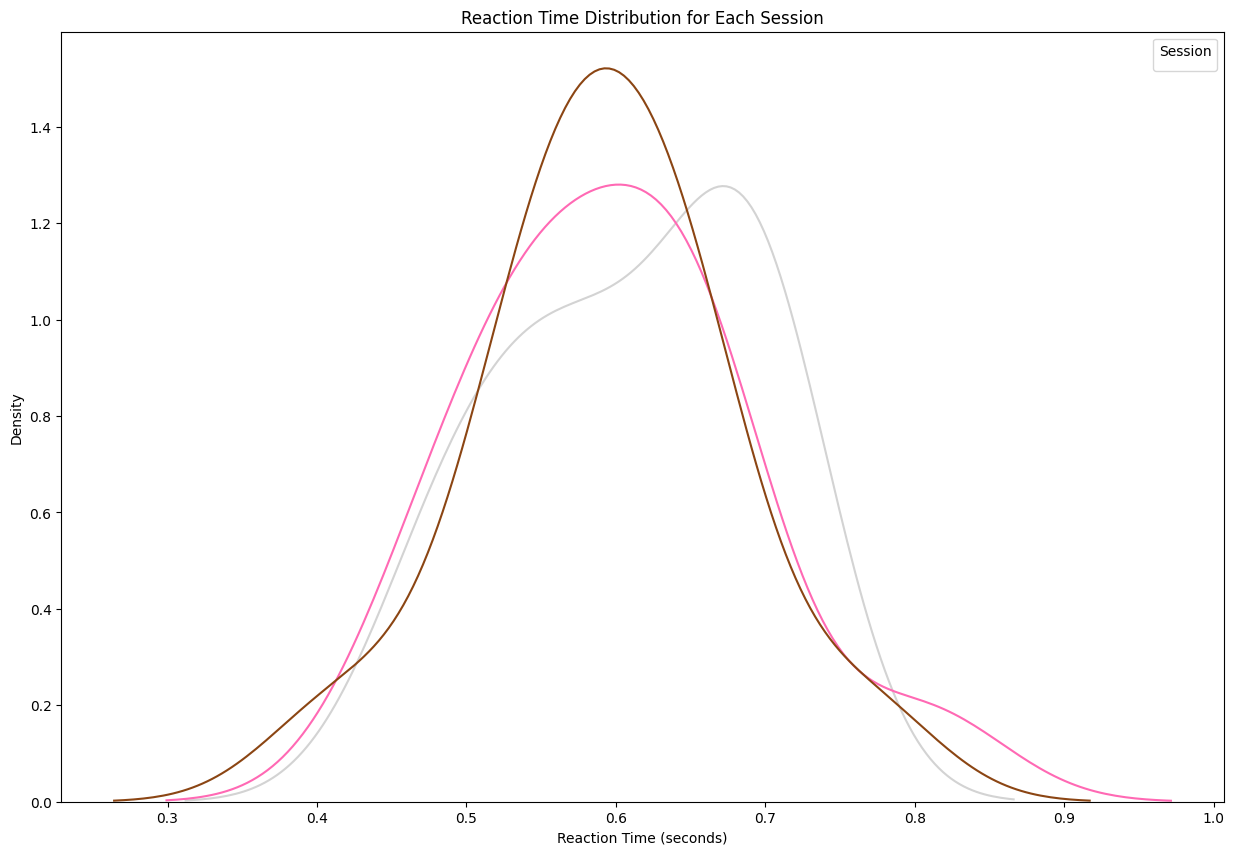

In [74]:
average_reaction_times = cleaned_data.groupby(['participant', 'session'])['reactionTime'].mean().reset_index()

# For correct responses only
custom_palette = {
    'brown': '#8B4513',  
    'pink': '#FF69B4',   
    'silence': '#D3D3D3' 
}

plt.figure(figsize=(15, 10))
sns.kdeplot(data=average_reaction_times, x="reactionTime", hue="session", palette=custom_palette)

plt.title('Reaction Time Distribution for Each Session')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Density')
plt.legend(title='Session')
plt.show()


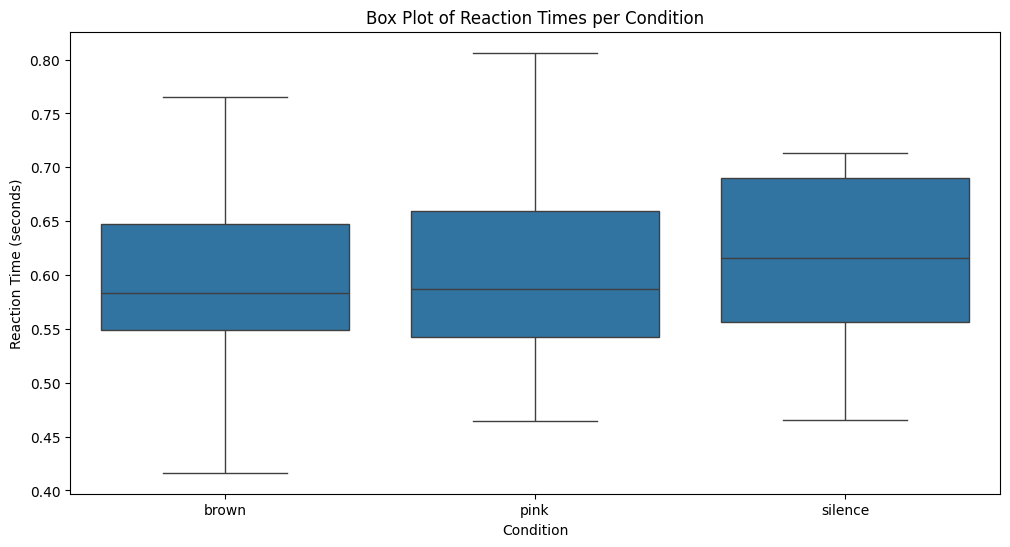

In [64]:
# Create box plots for each condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='session', y='reactionTime', data=average_reaction_times)
plt.title('Box Plot of Reaction Times per Condition')
plt.xlabel('Condition')
plt.ylabel('Reaction Time (seconds)')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


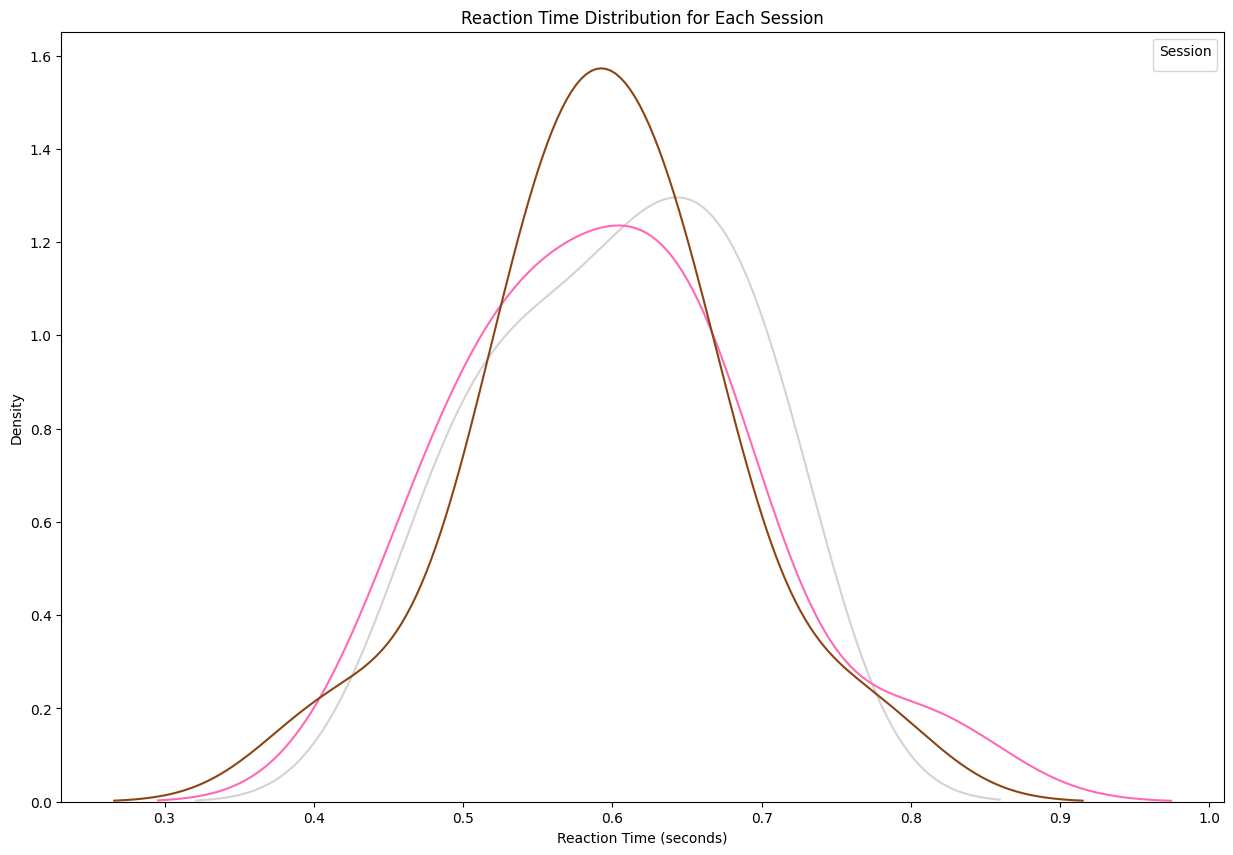

In [73]:
# For correct responses only
correct_responses = cleaned_data[cleaned_data['keyResponseCorrect'] == 1]
average_reaction_times_correct_responses = correct_responses.groupby(['participant', 'session'])['reactionTime'].mean().reset_index()

# For correct responses only
custom_palette = {
    'brown': '#8B4513',  
    'pink': '#FF69B4',   
    'silence': '#D3D3D3' 
}

plt.figure(figsize=(15, 10))
sns.kdeplot(data=average_reaction_times_correct_responses, x="reactionTime", hue="session", palette=custom_palette)

plt.title('Reaction Time Distribution for Each Session')
plt.xlabel('Reaction Time (seconds)')
plt.ylabel('Density')
plt.legend(title='Session')
plt.show()

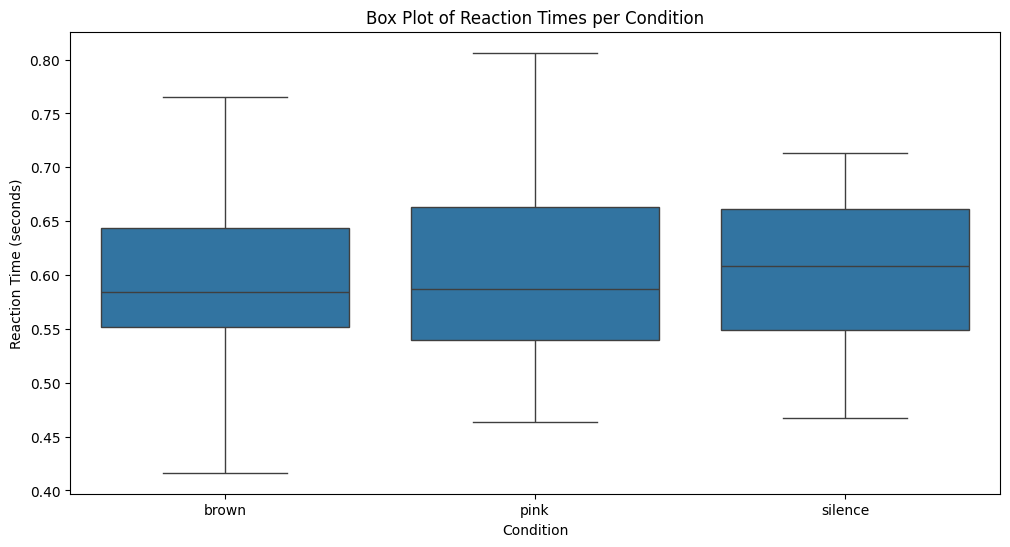

In [67]:
# Create box plots for each condition
plt.figure(figsize=(12, 6))
sns.boxplot(x='session', y='reactionTime', data=average_reaction_times_correct_responses)
plt.title('Box Plot of Reaction Times per Condition')
plt.xlabel('Condition')
plt.ylabel('Reaction Time (seconds)')
plt.show()

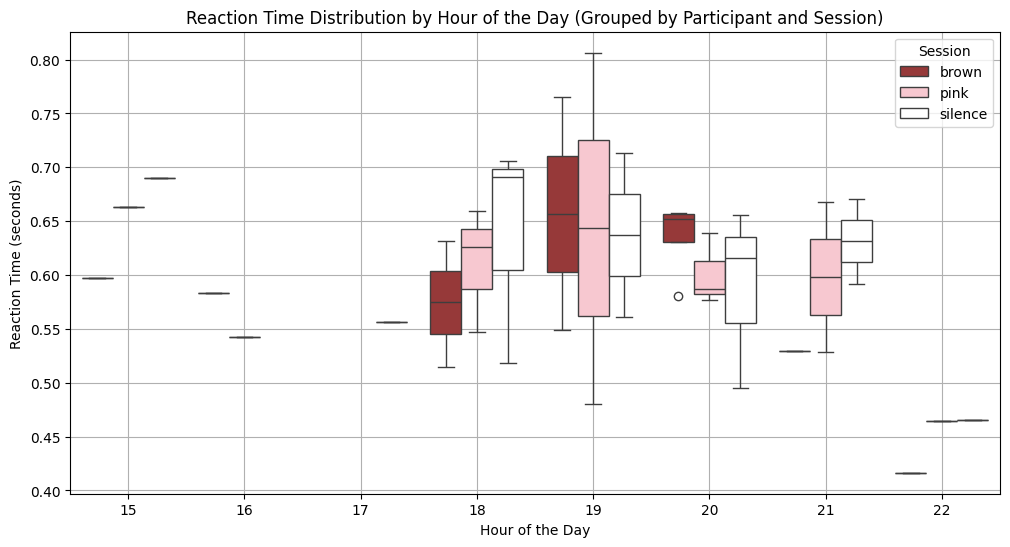

,participant,session,hour,reactionTime
0,200,brown,15,0.597322
1,200,pink,15,0.663236
2,200,silence,15,0.689830
3,201,brown,18,0.575296
4,201,pink,18,0.626294
5,201,silence,18,0.691080
6,202,brown,18,0.631834
7,202,pink,18,0.658994
8,202,silence,18,0.706021
9,203,brown,19,0.548970


In [86]:

# Assuming 'cleaned_data' is your DataFrame
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'], format='%Y-%m-%d_%Hh%M.%S.%f')
cleaned_data['hour'] = cleaned_data['date'].dt.hour

average_reaction_time_by_hour = cleaned_data.groupby(['participant', 'session', 'hour'])['reactionTime'].mean().reset_index()

# Define a color palette (modify as per your session labels and desired colors)
palette = {
    'brown': 'brown',
    'pink': 'pink',  
    'silence': 'white'
}

plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='reactionTime', data=average_reaction_time_by_hour, hue='session', palette=palette)
plt.title('Reaction Time Distribution by Hour of the Day (Grouped by Participant and Session)')
plt.xlabel('Hour of the Day')
plt.ylabel('Reaction Time (seconds)')
plt.grid(True)
plt.legend(title='Session')
plt.show()

average_reaction_time_by_hour

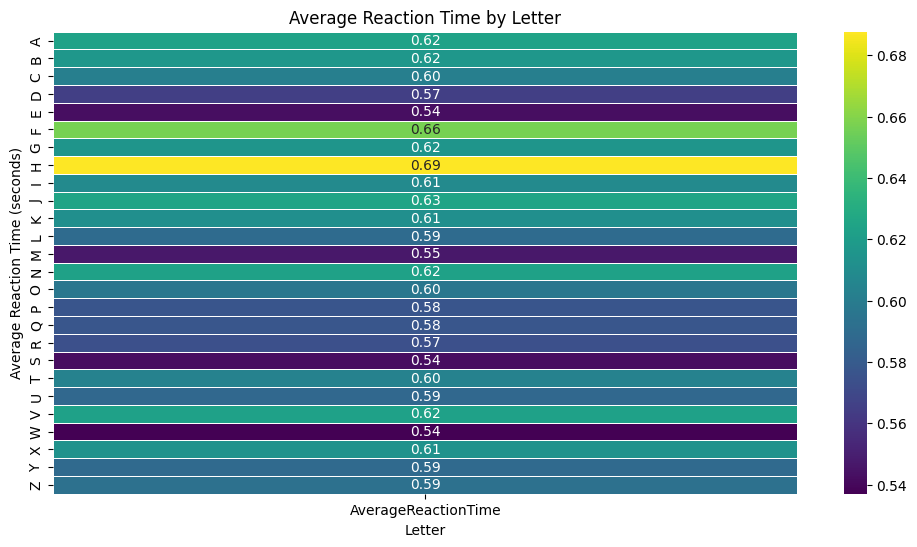

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For correct responses only
average_reaction_time_by_letter = correct_responses.groupby('letter')['reactionTime'].mean()

# Convert the Series to a DataFrame for seaborn
average_reaction_time_df = average_reaction_time_by_letter.reset_index()
average_reaction_time_df.columns = ['Letter', 'AverageReactionTime']

# Create a pivot table for the heatmap
heatmap_data = average_reaction_time_df.pivot_table(index='Letter', values='AverageReactionTime')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Reaction Time by Letter')
plt.xlabel('Letter')
plt.ylabel('Average Reaction Time (seconds)')
plt.show()